# Proyek Analisis Data: Bike Sharing
- Kelompok : 5
- Anggota : </br>
    * 10124015 - Muhamad Hakim Nur Majid</br>
    * 10124008 - Ferdi </br>
    * 10124037 - Maudina Apriliani</br>
    * 10124026 - Rakesya Wijaya</br>
    * 10124009 - Muhamad Aditya Wicaksono </br>
    * 10124046 - Khansa Noor Jeihan Kareira

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh perubahan musim terhadap jumlah rental sepeda di hari kerja dan di hari libur di tahun 2011 dan 2012 - 10124037 - Maudina Apriliani
2. Apakah jumlah penyewaan sepeda meningkat dari tahun 2011 ke 2012? - 10124046 - Khansa Noor Jeihan Kareira
3. Bagaimana tren penggunaan sepeda oleh pengguna terdaftar (registered) dari waktu ke waktu? - 10124026 - Rakesya Wijaya
4. Faktor apa yang paling berpengaruh terhadap jumlah rental sepeda? Cuaca, Kelembapan atau suhu ? - 10124015 - Muhamad Hakim Nur Majid
5. Bagaimana perbedaan jumlah rental sepeda pada awal bulan (tanggal 1–10) dibandingkan akhir bulan (tanggal 21–31) selama periode tahun 2011-2012 - 10124008 - Ferdi
6. Apakah ada perbedaan signifikan antara working days dan weekdays rental count - 10124009 - Muhamad Aditya Wicaksono


## Menyiapkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [ ]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df_day.duplicated().sum()

np.int64(0)

Berdasarkan hasil analisis diatas dapat dilakukan perubahan pada point berikut :

*   Mengubah tipe data dteday dari object ke datetime.
*   Mengubah isi data dari integer menjadi keterangan original data.
*   Mengubah judul dari beberapa kolom
*   Menghapus kolom yang tidak relevan   




### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [ ]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

season_map = {
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}

day_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday', 0: 'Sunday'
}

holiday_map = {
    0: "No", 1: "Yes"
}

workingday_map = {
    0: "No", 1: "Yes"
}



In [ ]:
df_day['mnth'] = df_day['mnth'].map(month_map)
df_day['season'] = df_day['season'].map(season_map)
df_day['weekday'] = df_day['weekday'].map(day_map)
df_day['holiday'] = df_day['holiday'].map(holiday_map)
df_day['workingday'] = df_day['workingday'].map(workingday_map)

df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,No,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,No,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,No,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,No,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,No,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,December,No,Thursday,Yes,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,December,No,Friday,Yes,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,December,No,Saturday,No,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,December,No,Sunday,No,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
new_names = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total',
    'weathersit': 'weather'
}

# 3. Apply the renaming
df_day = df_day.rename(columns=new_names)
df_day

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,January,No,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,No,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,No,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,No,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,No,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,December,No,Thursday,Yes,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,December,No,Friday,Yes,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,December,No,Saturday,No,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,December,No,Sunday,No,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df_day['date'] = pd.to_datetime(df_day['date'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    int64         
 4   month       731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
df_day = df_day.drop(columns=['atemp'])
df_day

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,January,No,Saturday,No,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,No,Sunday,No,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,No,Monday,Yes,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,No,Tuesday,Yes,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,No,Wednesday,Yes,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,December,No,Thursday,Yes,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,December,No,Friday,Yes,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,December,No,Saturday,No,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,December,No,Sunday,No,1,0.255833,0.483333,0.350754,364,1432,1796


## Exploratory Data Analysis (EDA)

### Explore ...

Text(0, 0.5, 'Frequency')

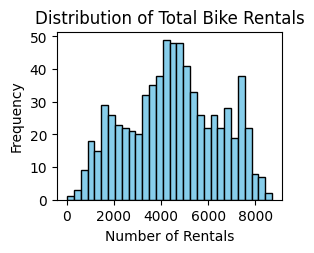

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(df_day['total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

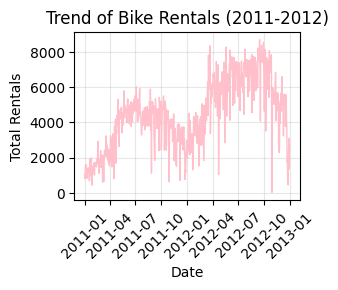

In [ ]:
plt.subplot(2, 2, 3)
plt.plot(df_day['date'], df_day['total'], color='pink', linewidth=1)
plt.title('Trend of Bike Rentals (2011-2012)')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [ ]:
df_day.describe()

,instant,date,year,weather,temp,humidity,windspeed,casual,registered,total
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452


## Visualization & Explanatory Analysis

### 1. bagaimana pengaruh perubahan musim terhadap jumlah rental sepeda di hari kerja dan di hari libur di tahun 2011 dan 2012 - 10124037 - Maudina Apriliani

## a. Data 2011


##### Mengambil Data Pertahun


In [ ]:
data2011 = df_day[df_day["year"] == 0].copy()
data2011

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,January,No,Saturday,No,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,No,Sunday,No,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,No,Monday,Yes,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,No,Tuesday,Yes,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,No,Wednesday,Yes,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,Spring,0,December,No,Tuesday,Yes,2,0.325000,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,Spring,0,December,No,Wednesday,Yes,1,0.299130,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,Spring,0,December,No,Thursday,Yes,1,0.248333,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,Spring,0,December,No,Friday,Yes,1,0.311667,0.636667,0.134337,491,2508,2999


##### Mengambil Data Musim

In [ ]:
dataMusim = data2011["season"].value_counts()
dataMusim

,count
season,
Fall,94
Summer,92
Spring,90
Winter,89


##### Mengelompokan Data Berdasarkan Season

In [ ]:
informasiData2011 = data2011.groupby(["season", "workingday"])["total"].mean().astype(int).reset_index()
informasiData2011

,season,workingday,total
0,Fall,No,4497
1,Fall,Yes,4450
2,Spring,No,1472
3,Spring,Yes,1763
4,Summer,No,3937
5,Summer,Yes,3704
6,Winter,No,3671
7,Winter,Yes,3661


##### Membuat Tabel Baru

In [ ]:
pivotInfo = informasiData2011.reset_index().pivot(
    index="season",
    columns="workingday",
    values="total"
)

pivotInfo.columns = ['Libur', 'Kerja']
pivotInfo.columns.name = None
pivotInfo.index.name = 'season'
pivotInfo = pivotInfo.reset_index()
pivotInfo

,season,Libur,Kerja
0,Fall,4497,4450
1,Spring,1472,1763
2,Summer,3937,3704
3,Winter,3671,3661


##### Visualisasi Data Rental Sepeda Dihari Kerja dan Hari Libur Pada Tahun 2011

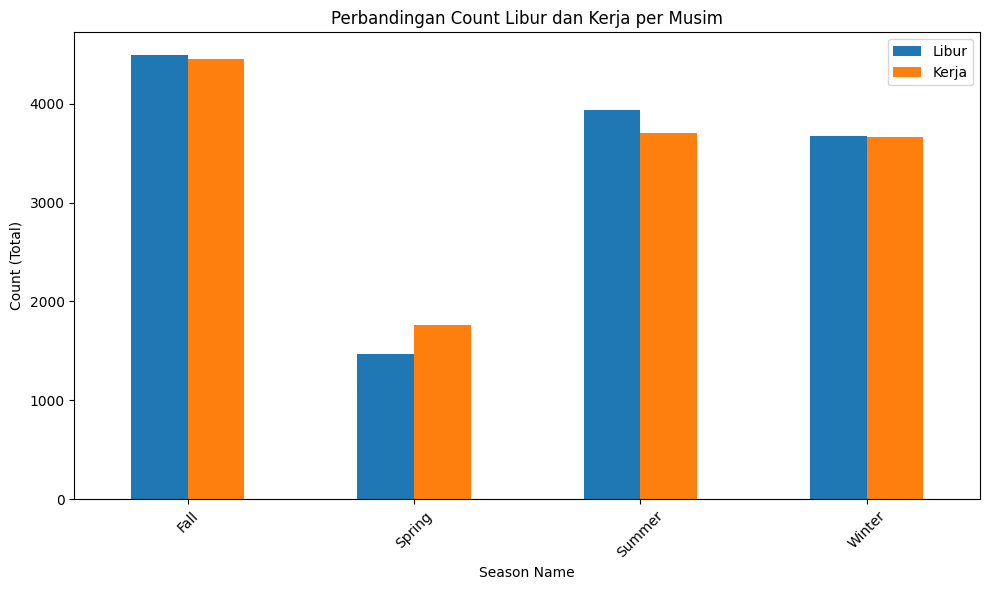

In [ ]:
pivotInfo.plot(
    x='season',
    kind='bar',
    figsize=(10, 6),
    title='Perbandingan Count Libur dan Kerja per Musim'
)
plt.ylabel('Count (Total)')
plt.xlabel('Season Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## b. Data 2012

##### Mengambil Data Pertahun

In [ ]:
data2012 = df_day[df_day["year"] == 1].copy()
data2012

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,total
365,366,2012-01-01,Spring,1,January,No,Sunday,No,1,0.370000,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,Spring,1,January,Yes,Monday,No,1,0.273043,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,Spring,1,January,No,Tuesday,Yes,1,0.150000,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,Spring,1,January,No,Wednesday,Yes,2,0.107500,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,Spring,1,January,No,Thursday,Yes,1,0.265833,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,December,No,Thursday,Yes,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,December,No,Friday,Yes,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,December,No,Saturday,No,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,December,No,Sunday,No,1,0.255833,0.483333,0.350754,364,1432,1796


##### Mengambil Data Musim

In [ ]:
dataMusim2012 = data2012["season"].value_counts()
dataMusim2012

,count
season,
Fall,94
Summer,92
Spring,91
Winter,89


##### Mengelompokan data berdasarkan season

In [ ]:
informasiData2012 = data2012.groupby(["season", "workingday"])["total"].mean().astype(int).reset_index()
informasiData2012

,season,workingday,total
0,Fall,No,6417
1,Fall,Yes,7005
2,Spring,No,3016
3,Spring,Yes,3797
4,Summer,No,6347
5,Summer,Yes,6149
6,Winter,No,5574
7,Winter,Yes,5891


##### Membuat Tabel Baru

In [ ]:
pivotInfo2012 = informasiData2012.reset_index().pivot(
    index="season",
    columns="workingday",
    values="total"
)

pivotInfo2012.columns = ['Libur', 'Kerja']
pivotInfo2012.columns.name = None
pivotInfo2012.index.name = 'season'
pivotInfo2012 = pivotInfo2012.reset_index()
pivotInfo2012

,season,Libur,Kerja
0,Fall,6417,7005
1,Spring,3016,3797
2,Summer,6347,6149
3,Winter,5574,5891


##### Visualisasi Data Rental Sepeda Dihari Kerja dan Hari Libur Pada Tahun 2012

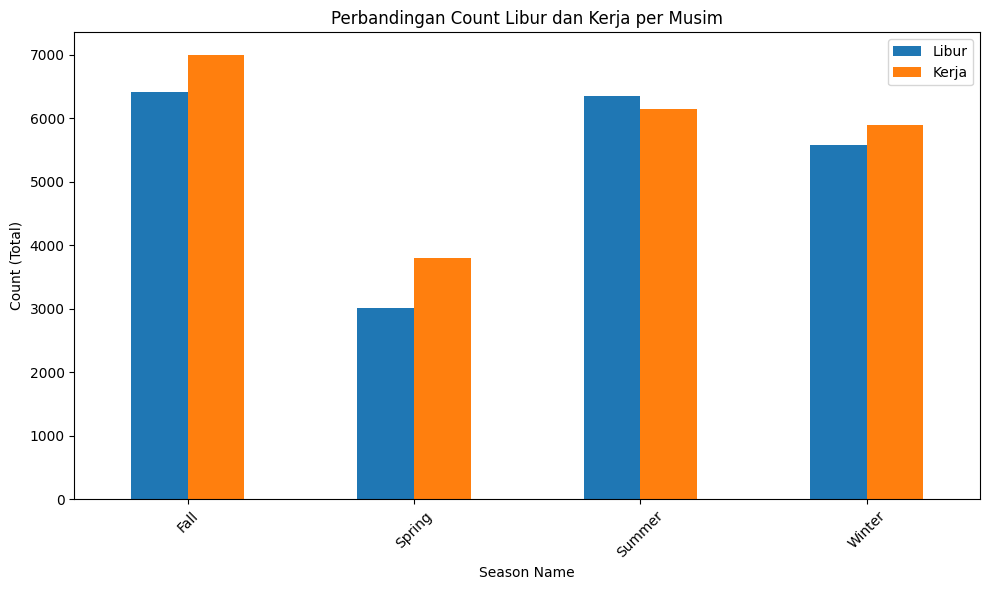

In [ ]:
pivotInfo2012.plot(
    x='season',
    kind='bar',
    figsize=(10, 6),
    title='Perbandingan Count Libur dan Kerja per Musim'
)
plt.ylabel('Count (Total)')
plt.xlabel('Season Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Keterangan Data Rental Sepeda Pada Tahun 2011 dan 2012

  Berdasarkan hasil analisis perbandingan jumlah rental sepeda pada hari libur dan hari kerja di setiap musim, dapat disimpulkan bahwa musim gugur (*fall*) menjadi musim dengan jumlah peminjaman sepeda tertinggi, baik dihari kerja ataupun dihari libur. Sebaliknya, musim semi (*spring*) memiliki jumlah peminjaman terendah, kemungkinan dipengaruhi oleh kondisi
cuaca yang masih kurang stabil di awal tahun. Selain itu pada sebagian musim, peminjaman sepeda pada hari kerja lebih tinggi dibandingkan hari libur. Pada musim panas (*summer*), peminjaman antara hari kerja dan hari libur cenderung seimbang. Dan di musim panas(*summer*) terjadi hampir setara antara rental sepeda di hari libur dan haril kerja.

Pada tahun 2011 memiliki sebaran yang seimbang untuk setiap musimnya kecuali pada musim semi (*spring*). Musim gugur (*fall*) dan musim dingin (*winter*) menunjukan jumlah hari libur dan hari kerja yang hampir seimbang, musim semi (*spring*) menampilkan hasil terendah diantara semua musim, dan untuk musim panas (*summer*) menunjukan perbedaan yang tidak terlalu jauh antara hari kerja dan hari libur.

Secara keseluruhan, analisis dua tahun data menunjukan bahwa faktor musim sangat berpengaruh untuk pola rental sepeda. Pola ini dapat menjadi acuan untuk pengelola rental sepeda agar dapat mengoptimalkan operasional sesuai dengan karakterisik setiap musim.

### Pertanyaan 2: Apakah jumlah penyewaan sepeda meningkat dari tahun 2011 ke 2012?

**Mengkonversi Date ke Datetime**

In [ ]:
df_day['date'] = pd.to_datetime(df_day['date'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    int64         
 4   month       731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  total       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(5)
memory usage: 85.8+ 

**Mengambil Year & Filter Data Tahun 2011 dan 2012**

In [ ]:
df_day['year'] = df_day['date'].dt.year
df_filter = df_day[df_day['year'].isin([2011, 2012])]

print(df_filter.head())

   instant       date  season  year    month holiday    weekday workingday  \
0        1 2011-01-01  Spring  2011  January      No   Saturday         No   
1        2 2011-01-02  Spring  2011  January      No     Sunday         No   
2        3 2011-01-03  Spring  2011  January      No     Monday        Yes   
3        4 2011-01-04  Spring  2011  January      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011  January      No  Wednesday        Yes   

   weather      temp  humidity  windspeed  casual  registered  total  
0        2  0.344167  0.805833   0.160446     331         654    985  
1        2  0.363478  0.696087   0.248539     131         670    801  
2        1  0.196364  0.437273   0.248309     120        1229   1349  
3        1  0.200000  0.590435   0.160296     108        1454   1562  
4        1  0.226957  0.436957   0.186900      82        1518   1600  


**Total rental pertahun dari tahun 2011 dan 2012**

In [ ]:
annual_rentals = df_filter.groupby('year')['total'].sum().reset_index()
print(annual_rentals)

   year    total
0  2011  1243103
1  2012  2049576


**Menghitung persentase kenaikan rental dari tahun 2011 ke 2012**

In [ ]:
rental_2011 = annual_rentals[annual_rentals['year'] == 2011]['total'].iloc[0]
rental_2012 = annual_rentals[annual_rentals['year'] == 2012]['total'].iloc[0]

percentage = ((rental_2012 - rental_2011) / rental_2011) * 100

print(f"Total Rental Tahun 2011: {rental_2011}")
print(f"Total Rental Tahun 2011: {rental_2012}")
print(f"Persentase Kenaikan dari Tahun 2011 ke 2022: {percentage:.2f}%")

Total Rental Tahun 2011: 1243103
Total Rental Tahun 2011: 2049576
Persentase Kenaikan dari Tahun 2011 ke 2022: 64.88%


**Visualisasi diagram batang**

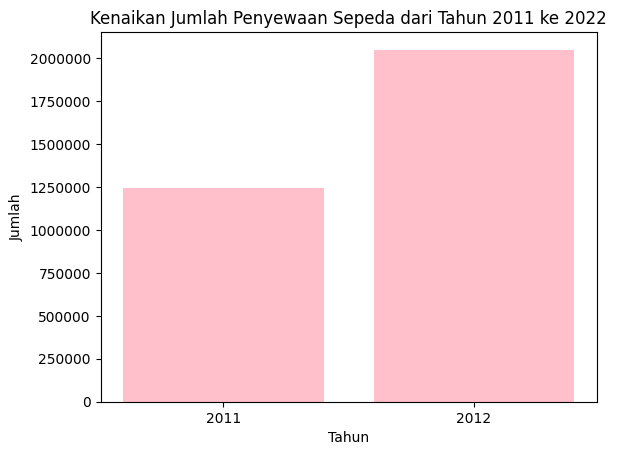

In [ ]:
kategori = [str(annual_rentals['year'][0]), str(annual_rentals['year'][1])]
nilai = [rental_2011, rental_2012]
warna = ['pink']

plt.bar(
    kategori, #sumbu x
    nilai, #sumbu y
    color = warna #warna
)

plt.title("Kenaikan Jumlah Penyewaan Sepeda dari Tahun 2011 ke 2022")
plt.xlabel("Tahun")
plt.ylabel('Jumlah')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

**Conclusion Pertanyaan 2**

Berdasarkan hasil analisis data penyewaan tahunan 2011 dan 2012,
terlihat adanya peningkatan secara signifikan dari tahun 2011 ke tahun 2012.

Total penyewaan pada tahun 2011 adalah: **1,243,103**
Total penyewaan pada tahun 2012 adalah: **2,049,576**

Dengan demikian, terjadi peningkatan sekitar **64,88%** dalam jumlah penyewaan sepeda selama periode tersebut. Peningkatan ini menunjukkan bahwa penggunaan layanan penyewaan sepeda berkembang pesat dari tahun 2011 ke 2012.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda oleh pengguna terdaftar (registered) dari waktu ke waktu?

1. Pengelompokan Rata-Rata Perbulan (avg/month)

In [ ]:
# Menambahkan kolom 'year' dan 'month' untuk pengelompokan
df_day['year'] = df_day['date'].dt.year
df_day['month'] = df_day['date'].dt.month
monthly_trend = df_day.groupby(['year', 'month'])['registered'].mean().reset_index()
monthly_trend

,year,month,registered
0,2011,1,1132.774194
1,2011,2,1499.035714
2,2011,3,1652.225806
3,2011,4,2417.466667
4,2011,5,3379.709677
5,2011,6,3763.333333
6,2011,7,3383.516129
7,2011,8,3479.000000
8,2011,9,3362.433333
9,2011,10,3170.612903


2. Membuat Kolom Gabungan 'date' untuk Plotting (Tahun-Bulan)

In [ ]:
monthly_trend['date'] = monthly_trend['year'].astype(str) + '-' + monthly_trend['month'].astype(str).str.zfill(2)

print("\nData Tren Bulanan (Rata-rata Pengguna Registered):")
monthly_trend.head()


Data Tren Bulanan (Rata-rata Pengguna Registered):


,year,month,registered,date
0,2011,1,1132.774194,2011-01
1,2011,2,1499.035714,2011-02
2,2011,3,1652.225806,2011-03
3,2011,4,2417.466667,2011-04
4,2011,5,3379.709677,2011-05


3. Visualisasi Tren

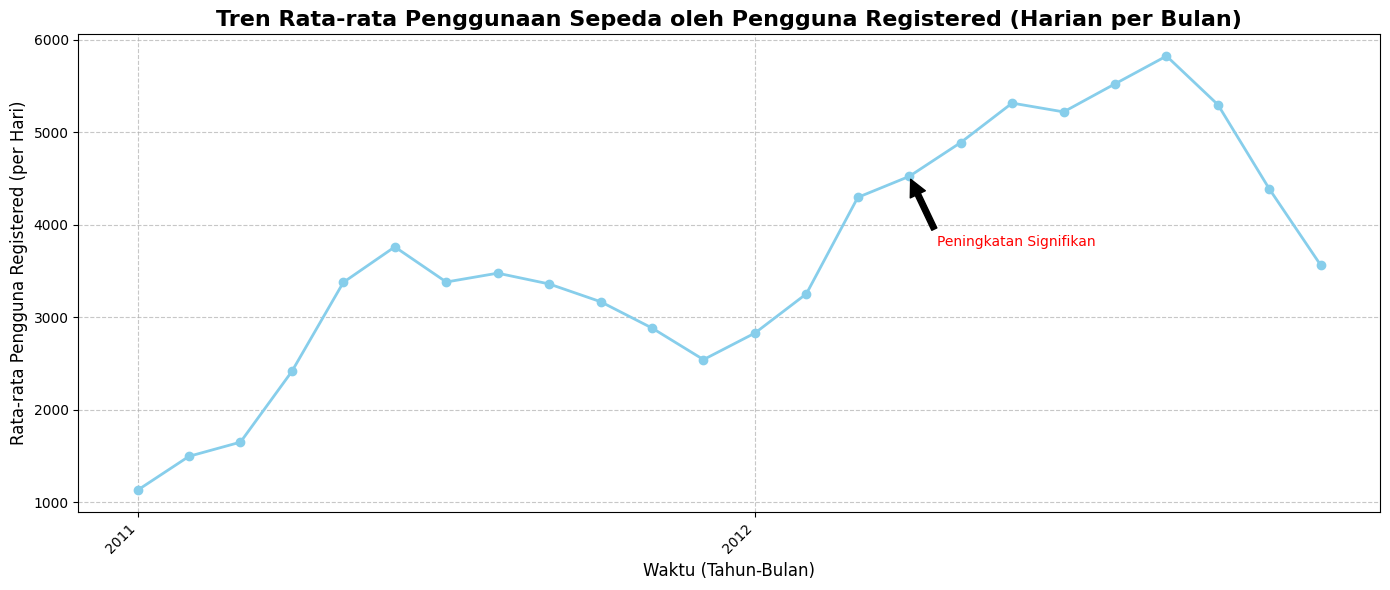

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend['date'], monthly_trend['registered'],
         marker='o', linestyle='-', color='skyblue', linewidth=2)

#Memberi judul dan label
plt.title('Tren Rata-rata Penggunaan Sepeda oleh Pengguna Registered (Harian per Bulan)',
          fontsize=16, fontweight='bold')
plt.xlabel('Waktu (Tahun-Bulan)', fontsize=12)
plt.ylabel('Rata-rata Pengguna Registered (per Hari)', fontsize=12)

#Menampilkan label untuk awal setiap tahun
x_ticks = monthly_trend[monthly_trend['month'] == 1]['date']
x_labels = monthly_trend[monthly_trend['month'] == 1]['year'].astype(str)

plt.xticks(x_ticks, x_labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() #Layout agar tidak terpotong

#Anotasi
plt.annotate('Peningkatan Signifikan',
             xy=(monthly_trend['date'].iloc[15], monthly_trend['registered'].iloc[15]),
             xytext=(20, -50),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='red')

plt.show()

Keterangan Analisa Tren Penggunaan Sepeda oleh Pengguna Registered

Berdasarkan analisa data dan plotline, terdapat **peningkatan yang signifikan** dalam rata-rata jumlah pengguna sepeda harian oleh pengguna registered selama periode waktu yang dicakup dataset. Pengguna cenderung meningkat tajam di bulan-bulan musim semi dan musim panas (Maret - September) dan menurun drastis pada bulan-bulan musim dingin (November - Februari). Pola ini menunjukkan **kestabilan setiap tahun**, sehingga menunjukkan pola musiman yang kuat. Puncak penggunaan di tahun 2012 juga jauh lebih tinggi daripada tahun sebelumnya. Ini mengindikasikan bahwa sistem bike sharing ini mampu meregistrasi dan mempertahankan pengguna dari tahun ke tahun.

Bagaimana analisa ini menjawab pertanyaan "Bagaimana tren penggunaan sepeda oleh pengguna terdaftar (registered) dari waktu ke waktu?"
* Tren ini menunjukkan bahwa basis pengguna registered terus bertambah dan sistem tersebut menjadi semakin populer dari waktu ke waktu.


Kenapa pertanyaan ini relevan untuk bisnis bike sharing?
* Dari pertanyaan ini, kita dapat mengukur pertumbuhan loyal costumer dan pertumbuhan bisnis dalam jangka panjang, dapat menentukan momentum untuk menyusun berbagai strategi bisnis, dan juga menentukan dasar keputusan investasi untuk pengembangan bisnis secara akurat.


Kesimpulan :
Tren yang meningkat adalah bukti kuat bahwa bisnis bike sharing ini berkembang dengan sehat dan mendapat kepercayaan dari pelanggan.




### Pertanyaan 4: Faktor apa yang paling berpengaruh terhadap jumlah rental sepeda? Cuaca, Kelembapan atau suhu ?

1. Menghitung korelasi dari temperature, humidity dan winspeed Untuk mengetahui hubungannya

In [ ]:
# Mengubah tipe data weather ke numeric
df_day['weather'] = pd.to_numeric(df_day['weather'])

# Denormalized temparature, humidity dan winspeed ke value aslinya
df_day['suhu'] = df_day['temp'] * 41
df_day['kelembapan'] = df_day['humidity'] * 100
df_day['kecepatan_angin'] = df_day['windspeed'] * 67

In [ ]:
cols_to_analyze = ['suhu', 'kelembapan', 'kecepatan_angin', 'weather', 'total']
correlations = df_day[cols_to_analyze].corr()

print("Korelasi dengan rental")
print(correlations['total'].sort_values())

Korelasi dengan rental
weather           -0.297391
kecepatan_angin   -0.234545
kelembapan        -0.100659
suhu               0.627494
total              1.000000
Name: total, dtype: float64


2. Menghitung Rata-Rata rental terhadap cuaca

In [ ]:
avg_rentals_weather = df_day.groupby('weather')['total'].mean()
print("Rata - rata jumlah rental terhadap cuaca")
print(avg_rentals_weather)

Rata - rata jumlah rental terhadap cuaca
weather
1    4876.786177
2    4035.862348
3    1803.285714
Name: total, dtype: float64


#Visualisasi Data

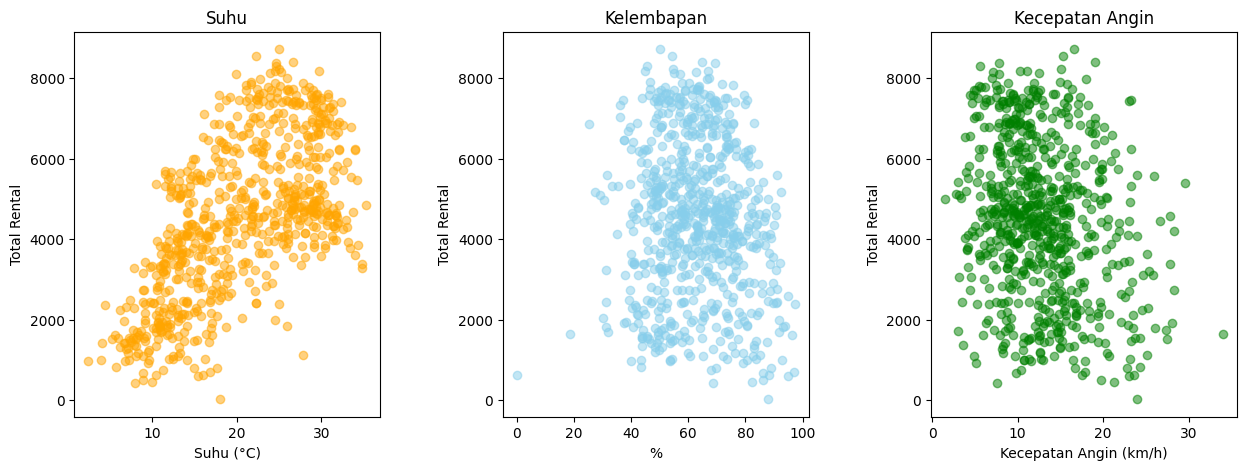

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_day['suhu'], df_day['total'], alpha=0.5, c='orange')
plt.title('Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Total Rental')

plt.subplot(1, 3, 2)
plt.scatter(df_day['kelembapan'], df_day['total'], alpha=0.5, c='skyblue')
plt.title('Kelembapan')
plt.xlabel('%')
plt.ylabel('Total Rental')

plt.subplot(1, 3, 3)
plt.scatter(df_day['kecepatan_angin'], df_day['total'], alpha=0.5, c='green')
plt.title('Kecepatan Angin')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Total Rental')

plt.subplots_adjust(wspace=0.4)

Text(0, 0.5, 'Total Rental')

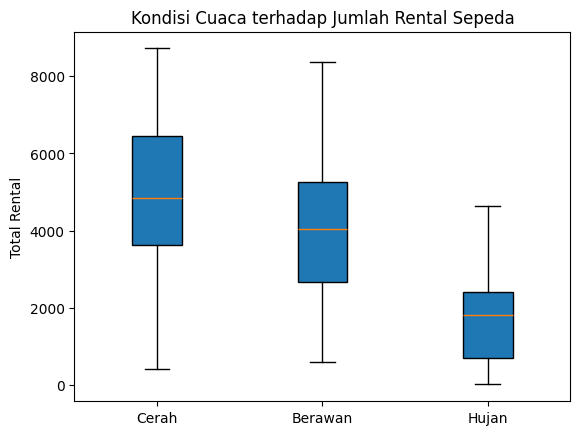

In [ ]:
weather_data = [df_day[df_day['weather'] == i]['total'] for i in sorted(df_day['weather'].unique())]
plt.boxplot(weather_data, tick_labels=['Cerah', 'Berawan', 'Hujan'], patch_artist=True)
plt.title('Kondisi Cuaca terhadap Jumlah Rental Sepeda')
plt.ylabel('Total Rental')

Berdasarkan hasil visualisasi dan perhitungan didapat hasil sebagai berikut:
1. Perhitungan korelasi.

    Dengan menghitung korelasi kita dapat mengetahui seberapa kuat suatu faktor berhubungan dengan jumlah penyewaan. Jika angkanya negatif, itu berarti ketika nilai faktor tersebut meningkat, jumlah penyewa justru menurun.
      *   Kondisi Cuaca : -0.29 (Dampak negatif terkuat)
      *   Kecepatan Angin: -0.23 (Dampak Negatif Moderat)
      *   Kelembapan: -0.10 (Dampak Negatif Lemah)
      *   Suhu: +0.63 (Dampak Positif Kuat)

2. Visualisasi Data

    Grafik Suhu : terlihat saat cuaca lebih hangat, lebih banyak orang yang berkendara, dan akan menurun ketika cuaca semakin dingin.
    
    Grafik Kelembapan : terlihat data terlalu tersebar dan tidak memiliki pola yang jelas, sehingga mengonfirmasi bahwa kelembapan saja bukan faktor penentu besar bagi sebagian perental.

    Grafik Kecepatan Angin : terlihat bahwa data tersebar di sebelah kiri dan menurun semakin kekanan. hal ini menandakan bahwa semakin tinggi kecapatan angin semakin turun jumlah perental, walaupun tidak signifikan.

    Grafik Cuaca : Grafik ini menunjukkan faktor yang paling jelas

    *   Cerah   : Rata - rata penyewaan tinggi (~4876)
    *   Berawan : Sedikit lebih rendah (~4035)
    *   Hujan   : Penurunan Drastis (~1803)







### Pertanyaan 5 : Bagaimana perbedaan jumlah rental sepeda pada awal bulan (tanggal 1–10) dibandingkan akhir bulan (tanggal 21–31) selama periode tahun 2011-2012

1.Membuat Kolom Periode Awal Dan Akhir Bulan

In [ ]:
df_day['day'] = df_day['date'].dt.day

df_day['periode'] = df_day['day'].apply(lambda x: 'Awal Bulan' if 1 <= x <= 10
                                else 'Akhir Bulan' if x >= 21
                                else 'Lainnya')

df_day[['date', 'day', 'periode']]

,date,day,periode
0,2011-01-01,1,Awal Bulan
1,2011-01-02,2,Awal Bulan
2,2011-01-03,3,Awal Bulan
3,2011-01-04,4,Awal Bulan
4,2011-01-05,5,Awal Bulan
...,...,...,...
726,2012-12-27,27,Akhir Bulan
727,2012-12-28,28,Akhir Bulan
728,2012-12-29,29,Akhir Bulan
729,2012-12-30,30,Akhir Bulan


2. Menghitung Rata-rata Rental: Awal vs Akhir Bulan Selama Periode Tahun 2011-2012

In [ ]:
df_filtered = df_day[df_day['periode'] != 'Lainnya']

avg_rental = df_filtered.groupby('periode')['total'].mean()

print("Rata-rata rental Awal vs Akhir Bulan:")
print(avg_rental)


Rata-rata rental Awal vs Akhir Bulan:
periode
Akhir Bulan    4352.613546
Awal Bulan     4494.275000
Name: total, dtype: float64


3. Visualisasi Perbandingan Awal & Akhir Bulan Selama Periode Tahun 2011-2012

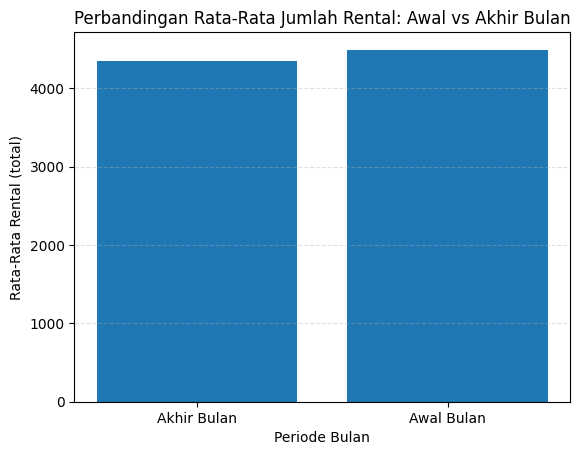

In [ ]:
plt.bar(avg_rental.index, avg_rental)

plt.title("Perbandingan Rata-Rata Jumlah Rental: Awal vs Akhir Bulan")
plt.xlabel("Periode Bulan")
plt.ylabel("Rata-Rata Rental (total)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Dari hasil analisis, terlihat bahwa rata-rata penyewaan sepeda di awal bulan (1–10) lebih tinggi dibandingkan akhir bulan (21–31).
Awal bulan mencatat angka sekitar 4494 penyewaan per hari, sedangkan akhir bulan sedikit lebih rendah, yaitu 4353 penyewaan per hari.
<br>
Perbedaan ini menunjukkan bahwa pengguna cenderung lebih aktif menyewa sepeda di awal bulan. Hal ini bisa terjadi karena beberapa alasan, misalnya:
* Awal bulan biasanya orang baru menerima gaji, sehingga mereka lebih leluasa melakukan aktivitas seperti olahraga atau rekreasi.

* Jadwal dan aktivitas di awal bulan mungkin lebih stabil, sehingga lebih banyak waktu untuk bersepeda.

* Menjelang akhir bulan, sebagian orang mulai mengurangi pengeluaran atau aktivitas luar karena kesibukan atau faktor finansial.

Meskipun ada perbedaan, peningkatan hanya sebesar 3,26% menunjukkan
bahwa perbedaan awal dan akhir bulan tidak terlalu signifikan dalam
mempengaruhi penyewaan sepeda. Faktor-faktor lain seperti kondisi cuaca,
hari kerja versus hari libur, dan seasonal pattern mungkin memiliki
pengaruh yang lebih besar terhadap penggunaan sepeda. Namun, dari
perspektif bisnis, peningkatan 3,26% ini tetap bisa dimanfaatkan untuk
strategi promosi atau penawaran khusus di awal bulan untuk memaksimalkan
revenue.

### Pertanyaan 6: Apakah ada perbedaan signifikan antara working days dan weekdays rental count - 10124009 - Muhamad Aditya Wicaksono

1. Mengelompokkan data holiday dan weekday

In [ ]:
impact_data = df_day.groupby(['workingday', 'weekday'])['total'].mean().reset_index()
impact_data

,workingday,weekday,total
0,No,Friday,3247.000000
1,No,Monday,3973.666667
2,No,Saturday,4550.542857
3,No,Sunday,4228.828571
4,No,Thursday,1960.000000
5,No,Tuesday,1013.000000
6,No,Wednesday,7403.000000
7,Yes,Friday,4718.588235
8,Yes,Monday,4398.866667
9,Yes,Thursday,4720.343137


2. Membuat grouping untuk pemesanan saat weekday

In [ ]:
weekday_order_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
impact_data['weekday_order'] = impact_data['weekday'].map(weekday_order_map)
impact_data = impact_data.sort_values(by=['workingday', 'weekday_order']).reset_index(drop=True)

impact_data['category'] = impact_data['workingday'].replace({'Yes': 'Working Day', 'No': 'Weekend/Holiday'})
impact_data

,workingday,weekday,total,weekday_order,category
0,No,Monday,3973.666667,0,Weekend/Holiday
1,No,Tuesday,1013.000000,1,Weekend/Holiday
2,No,Wednesday,7403.000000,2,Weekend/Holiday
3,No,Thursday,1960.000000,3,Weekend/Holiday
4,No,Friday,3247.000000,4,Weekend/Holiday
5,No,Saturday,4550.542857,5,Weekend/Holiday
6,No,Sunday,4228.828571,6,Weekend/Holiday
7,Yes,Monday,4398.866667,0,Working Day
8,Yes,Tuesday,4544.621359,1,Working Day
9,Yes,Wednesday,4520.825243,2,Working Day


3. Menampilkan visualisasi final weekday dan holiday count

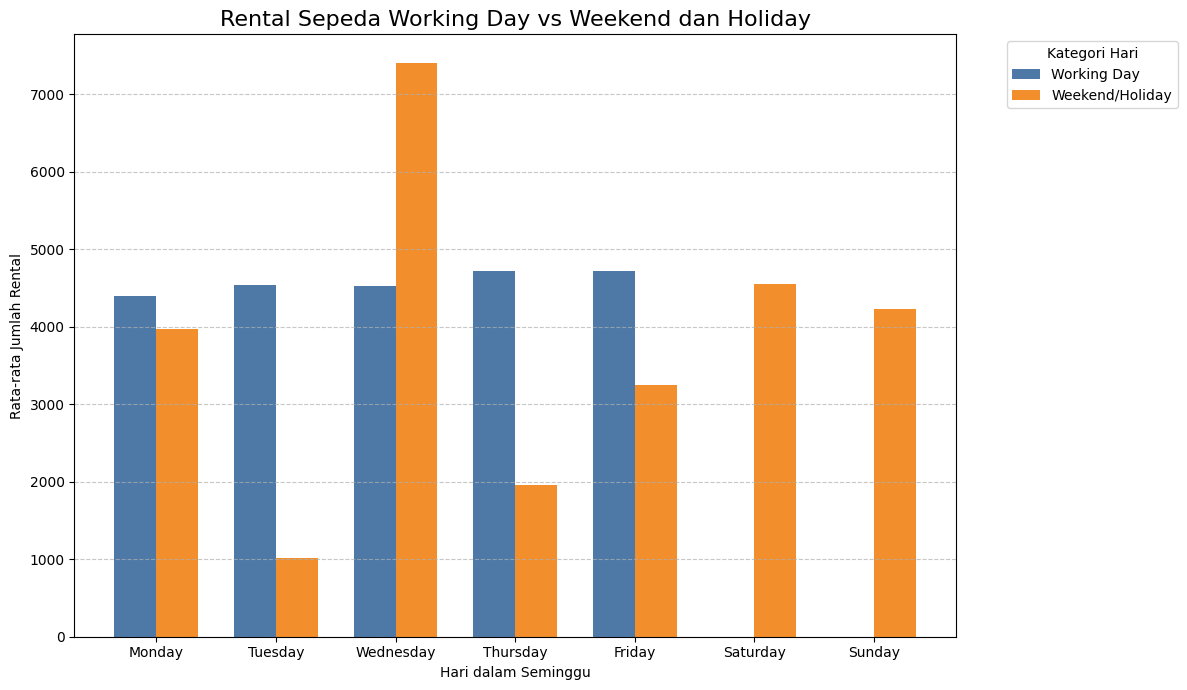

In [ ]:
weekdays = list(weekday_order_map.keys())
num_weekdays = len(weekdays)
bar_width = 0.35
categories = ['Working Day', 'Weekend/Holiday']

r = np.arange(num_weekdays)
fig, ax = plt.subplots(figsize=(12, 7))

for i, cat in enumerate(categories):
    subset = impact_data[impact_data['category'] == cat]
    subset = subset.set_index('weekday').reindex(weekdays).reset_index()
    bar_pos = r + (i - (len(categories) - 1) / 2) * bar_width

    ax.bar(
        bar_pos,
        subset['total'],
        width=bar_width,
        label=cat,
        color='#4e79a7' if cat == 'Working Day' else '#f28e2b'
    )


ax.set_title('Rental Sepeda Working Day vs Weekend dan Holiday', fontsize=16)
ax.set_xlabel('Hari dalam Seminggu')
ax.set_ylabel('Rata-rata Jumlah Rental')
ax.set_xticks(r)
ax.set_xticklabels(weekdays)
ax.legend(title='Kategori Hari', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Conclusion

<h3> Conclution Pertanyaan 1 </h3>
Bagaimana pengaruh perubahan musim terhadap jumlah rental sepeda di hari kerja dan di hari libur di tahun 2011 dan 2012

Berdasarkan hasil analisis perbandingan jumlah rental sepeda pada hari libur dan hari kerja di setiap musim, dapat disimpulkan bahwa musim gugur (*fall*) menjadi musim dengan jumlah peminjaman sepeda tertinggi, baik dihari kerja ataupun dihari libur. Sebaliknya, musim semi (*spring*) memiliki jumlah peminjaman terendah, kemungkinan dipengaruhi oleh kondisi
cuaca yang masih kurang stabil di awal tahun. Selain itu pada sebagian musim, peminjaman sepeda pada hari kerja lebih tinggi dibandingkan hari libur. Pada musim panas (*summer*), peminjaman antara hari kerja dan hari libur cenderung seimbang. Dan di musim panas(*summer*) terjadi hampir setara antara rental sepeda di hari libur dan haril kerja.

Pada tahun 2011 memiliki sebaran yang seimbang untuk setiap musimnya kecuali pada musim semi (*spring*). Musim gugur (*fall*) dan musim dingin (*winter*) menunjukan jumlah hari libur dan hari kerja yang hampir seimbang, musim semi (*spring*) menampilkan hasil terendah diantara semua musim, dan untuk musim panas (*summer*) menunjukan perbedaan yang tidak terlalu jauh antara hari kerja dan hari libur.

Secara keseluruhan, analisis dua tahun data menunjukan bahwa faktor musim sangat berpengaruh untuk pola rental sepeda. Pola ini dapat menjadi acuan untuk pengelola rental sepeda agar dapat mengoptimalkan operasional sesuai dengan karakterisik setiap musim.

<h3> Conclution Pertanyaan 2 </h3>
Apakah jumlah penyewaan sepeda meningkat dari tahun 2011 ke 2012?

Berdasarkan hasil analisis data penyewaan tahunan 2011 dan 2012, terlihat adanya peningkatan secara signifikan dari tahun 2011 ke tahun 2012.

Total penyewaan pada tahun 2011 adalah: 1,243,103 Total penyewaan pada tahun 2012 adalah: 2,049,576

Dengan demikian, terjadi peningkatan sekitar 64,88% dalam jumlah penyewaan sepeda selama periode tersebut. Peningkatan ini menunjukkan bahwa penggunaan layanan penyewaan sepeda berkembang pesat dari tahun 2011 ke 2012.

<h3> Conclution Pertanyaan 3 </h3>
Bagaimana tren penggunaan sepeda oleh pengguna terdaftar (registered) dari waktu ke waktu?

Keterangan Analisa Tren Penggunaan Sepeda oleh Pengguna Registered

Berdasarkan analisa data dan plotline, terdapat **peningkatan yang signifikan** dalam rata-rata jumlah pengguna sepeda harian oleh pengguna registered selama periode waktu yang dicakup dataset. Pengguna cenderung meningkat tajam di bulan-bulan musim semi dan musim panas (Maret - September) dan menurun drastis pada bulan-bulan musim dingin (November - Februari). Pola ini menunjukkan **kestabilan setiap tahun**, sehingga menunjukkan pola musiman yang kuat. Puncak penggunaan di tahun 2012 juga jauh lebih tinggi daripada tahun sebelumnya. Ini mengindikasikan bahwa sistem bike sharing ini mampu meregistrasi dan mempertahankan pengguna dari tahun ke tahun.

Bagaimana analisa ini menjawab pertanyaan "Bagaimana tren penggunaan sepeda oleh pengguna terdaftar (registered) dari waktu ke waktu?"
* Tren ini menunjukkan bahwa basis pengguna registered terus bertambah dan sistem tersebut menjadi semakin populer dari waktu ke waktu.


Kenapa pertanyaan ini relevan untuk bisnis bike sharing?
* Dari pertanyaan ini, kita dapat mengukur pertumbuhan loyal costumer dan pertumbuhan bisnis dalam jangka panjang, dapat menentukan momentum untuk menyusun berbagai strategi bisnis, dan juga menentukan dasar keputusan investasi untuk pengembangan bisnis secara akurat.


Kesimpulan :
Tren yang meningkat adalah bukti kuat bahwa bisnis bike sharing ini berkembang dengan sehat dan mendapat kepercayaan dari pelanggan.




<h3> Conclution Pertanyaan 4 </h3>
Faktor apa yang paling berpengaruh terhadap jumlah rental sepeda? Cuaca, Kelembapan atau suhu ?

Berdasarkan hasil visualisasi dan perhitungan didapat hasil sebagai berikut:
1. Perhitungan korelasi.

    Dengan menghitung korelasi kita dapat mengetahui seberapa kuat suatu faktor berhubungan dengan jumlah penyewaan. Jika angkanya negatif, itu berarti ketika nilai faktor tersebut meningkat, jumlah penyewa justru menurun.
      *   Kondisi Cuaca : -0.29 (Dampak negatif terkuat)
      *   Kecepatan Angin: -0.23 (Dampak Negatif Moderat)
      *   Kelembapan: -0.10 (Dampak Negatif Lemah)
      *   Suhu: +0.63 (Dampak Positif Kuat)

2. Visualisasi Data

    Grafik Suhu : terlihat saat cuaca lebih hangat, lebih banyak orang yang berkendara, dan akan menurun ketika cuaca semakin dingin.
    
    Grafik Kelembapan : terlihat data terlalu tersebar dan tidak memiliki pola yang jelas, sehingga mengonfirmasi bahwa kelembapan saja bukan faktor penentu besar bagi sebagian perental.

    Grafik Kecepatan Angin : terlihat bahwa data tersebar di sebelah kiri dan menurun semakin kekanan. hal ini menandakan bahwa semakin tinggi kecapatan angin semakin turun jumlah perental, walaupun tidak signifikan.

    Grafik Cuaca : Grafik ini menunjukkan faktor yang paling jelas

    *   Cerah   : Rata - rata penyewaan tinggi (~4876)
    *   Berawan : Sedikit lebih rendah (~4035)
    *   Hujan   : Penurunan Drastis (~1803)







<h3> Conclution Pertanyaan 5 </h3>
Bagaimana perbedaan jumlah rental sepeda pada awal bulan (tanggal 1–10) dibandingkan akhir bulan (tanggal 21–31) selama periode tahun 2011-2012

Dari hasil analisis, terlihat bahwa rata-rata penyewaan sepeda di awal bulan (1–10) lebih tinggi dibandingkan akhir bulan (21–31).
Awal bulan mencatat angka sekitar 4494 penyewaan per hari, sedangkan akhir bulan sedikit lebih rendah, yaitu 4353 penyewaan per hari.
<br>
Perbedaan ini menunjukkan bahwa pengguna cenderung lebih aktif menyewa sepeda di awal bulan. Hal ini bisa terjadi karena beberapa alasan, misalnya:
* Awal bulan biasanya orang baru menerima gaji, sehingga mereka lebih leluasa melakukan aktivitas seperti olahraga atau rekreasi.
* Jadwal dan aktivitas di awal bulan mungkin lebih stabil, sehingga lebih banyak waktu untuk bersepeda.
* Menjelang akhir bulan, sebagian orang mulai mengurangi pengeluaran atau aktivitas luar karena kesibukan atau faktor finansial.

Meskipun ada perbedaan, peningkatan hanya sebesar 3,26% menunjukkan
bahwa perbedaan awal dan akhir bulan tidak terlalu signifikan dalam
mempengaruhi penyewaan sepeda. Faktor-faktor lain seperti kondisi cuaca,
hari kerja versus hari libur, dan seasonal pattern mungkin memiliki
pengaruh yang lebih besar terhadap penggunaan sepeda. Namun, dari
perspektif bisnis, peningkatan 3,26% ini tetap bisa dimanfaatkan untuk
strategi promosi atau penawaran khusus di awal bulan untuk memaksimalkan
revenue.

<h3> Conclution Pertanyaan 6 </h3>
Apakah ada perbedaan signifikan antara working days dan weekdays rental count

Berdasarkan grafik diatas, dapat disimpulkan bahwa penggunaan sepeda sangat diminati baik di working day atau holiday, dengan beberapa poin sebagai berikut :
   
*   Pada working day, penggunaan sepeda terasa stabil dengan rentang antara 4000 - 4500
*   pada weekend, penggunaan sepeda juga terasa stabil di angka 4000-4500
*   Terdapat lonjakan yang sangat tinggi di hari rabu karena setelah meriset kembali dataset, ditemukan bahwa ternyata hari tersebut tepat berada pada hari libur nasional tanggal 4 Juli 2012
*   Penurunan terjadi pula di hari selasa, karena setelah diriset kembali di dataset, ternyata holiday hanya bertepatan satu hari dengan natal, dan dikarenakan suhu yang dingin pemakaian sepeda menjadi sedikit